<h1 style="text-align: center; font-family: 'Arial', sans-serif; color: #0078D4; font-weight: bold; font-size: 32px; ">NextHourMETAR @ KMIA</h1>
<h3 style="text-align: center; font-family: 'Arial', sans-serif; color: #0078D4; font-weight: bold; font-size: 24px;border-bottom: 2px solid #0078D4; padding-bottom: 10px;">by Dominikus Brian from DreamBrook Tech domi@dreambrook.tech</h3>

In this short notebook, we demonstrate the deployment usage of Next-Hour METAR @ KMIA ML model developed for OCEAN Data Challenge hosted in Desight AI. The notebook comes with details given in the report titled "Flying Safer Around Miami: Predictive Machine Learning Model for Real-Time Meteorological Aerodrome Report (METAR)".

For any question or futher inquiries please reach out to domi@dreambrook.tech

Steps Performed in this notebook :

1. Setup Dependencies and Prepare Input Data

2. Perform two Next-Hour METAR deployment with Specific Start Index or Random Start Index mode

3. Plot the obtained scores to benchmark the prediction result.

## 1 . Setup and Prepare input Data

In [ ]:
# Imports 
# Install Python package for the tutorial
# ! pip install DreamBrookPy
import DreamBrookPy.MachineLearning as ML
import DreamBrookPy.DataChef as DC


In [1]:
import sys
package_path = '/home/Lakehouse/DreamBrookPy'
if package_path not in sys.path:
    sys.path.append(package_path)
import DreamBrookPy.MachineLearning as ML
import DreamBrookPy.DataChef as DC
import DreamBrookPy.Plotting as DBPlot

2024-02-20 07:32:45.167246: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# Suppress all future & user warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

The data preparation is to simply obtain a .txt file containing list of METAR data. 

This Notebook should come accompanied with a file called "METAR_Data_Sample.txt"
the first few lines of which shown below :

airport_id,date,metar

KMIA,2014-01-01,KMIA 010053Z 04009G15KT 10SM OVC025 23/18 A3021 RMK AO2 SLP229 T02330183

KMIA,2014-01-01,KMIA 010153Z 04009G15KT 10SM OVC023 23/18 A3021 RMK AO2 SLP231 T02330183

KMIA,2014-01-01,KMIA 010253Z 05009G19KT 10SM -RA OVC025 23/18 A3023 RMK AO2 RAB44 SLP236 P0000 60000 T02280178 51013


## 2. Next-Hour METAR @ KMIA Deployment

In [18]:
### Example using Specific Start Index 
# Load Model 
model_dict_1 = load_dict('../results/model/Model_Set_1.pkl')
model_dict = model_dict_1 # model used for prediction

# Save results to folder
filedir = '../results/model'


# Deployment test:
txt_filepath = '../dataset/METAR_Data_Sample.txt'
use_start_index = 1 # Random version
n_deploy = 1 # if using start index n_deploy = 1
window_length = 24 # data window length (need to be > time steps of model)
time_steps =  6 # Need to match the model window size


############# No Changes needed here.
deployment_df, raw_METAR_dict =ML.deploy_METAR_prediction(txt_filepath, window_length, time_steps,model_dict,
                                                          n_deploy,start_index=use_start_index)
score_df = ML.get_assessment_score(deployment_df,raw_METAR_dict)
save_Model_Set_results(filedir, deployment_df, raw_METAR_dict,score_df)

The data has been saved to ../results/model/model_raw_dict.pkl.


In [19]:
score_df

,Wind Degree,Wind Speed,Visibility,Cloud Coverage,Temperature,Dew,Air Pressure,String Similarity
0,93.636364,66.666667,100.0,71.844444,95.833333,95.454545,100.0,71.210526


In [20]:
### Random 
# Load Model 
model_dict_1 = load_dict('../results/model/Model_Set_1.pkl')
model_dict = model_dict_1 # model used for prediction

# Save results to folder
filedir = '../results/model'


# Deployment test:
txt_filepath = '../dataset/METAR_Data_Sample.txt'
use_start_index = False # Random start index version
window_length = 24 # data window length (need to be > time steps of model)
time_steps =  6 # Need to match the model window size
n_deploy = 5 # number of pick for random starting index @ each deployment

############# No Changes needed here.
deployment_df_random, raw_METAR_dict_random =ML.deploy_METAR_prediction(txt_filepath, window_length, time_steps,model_dict, n_deploy,start_index=use_start_index)
score_df_random = ML.get_assessment_score(deployment_df_random,raw_METAR_dict_random)
save_Model_Set_results(filedir, deployment_df_random, raw_METAR_dict_random,score_df_random)

The data has been saved to ../results/model/model_raw_dict.pkl.


/home/Lakehouse/DreamBrookPy/DreamBrookPy/MachineLearning.py:543: RuntimeWarning: divide by zero encountered in scalar divide
  s_diff = np.abs((s1-s2)/s2)


In [45]:
score_df_random

,Wind Degree,Wind Speed,Visibility,Cloud Coverage,Temperature,Dew,Air Pressure,String Similarity
0,-52.500000,88.888889,40.0,81.629630,90.000000,100.0,100.000000,66.000000
1,85.000000,81.818182,90.0,77.228571,96.296296,100.0,99.901186,78.666667
2,95.714286,60.000000,90.0,95.613333,92.307692,100.0,99.901865,90.558824
3,73.846154,-100.000000,90.0,42.353846,95.454545,100.0,99.901575,69.352941
4,50.000000,50.000000,100.0,62.211111,100.000000,100.0,99.901961,68.000000


## 3. Plot METAR Models Benchmark

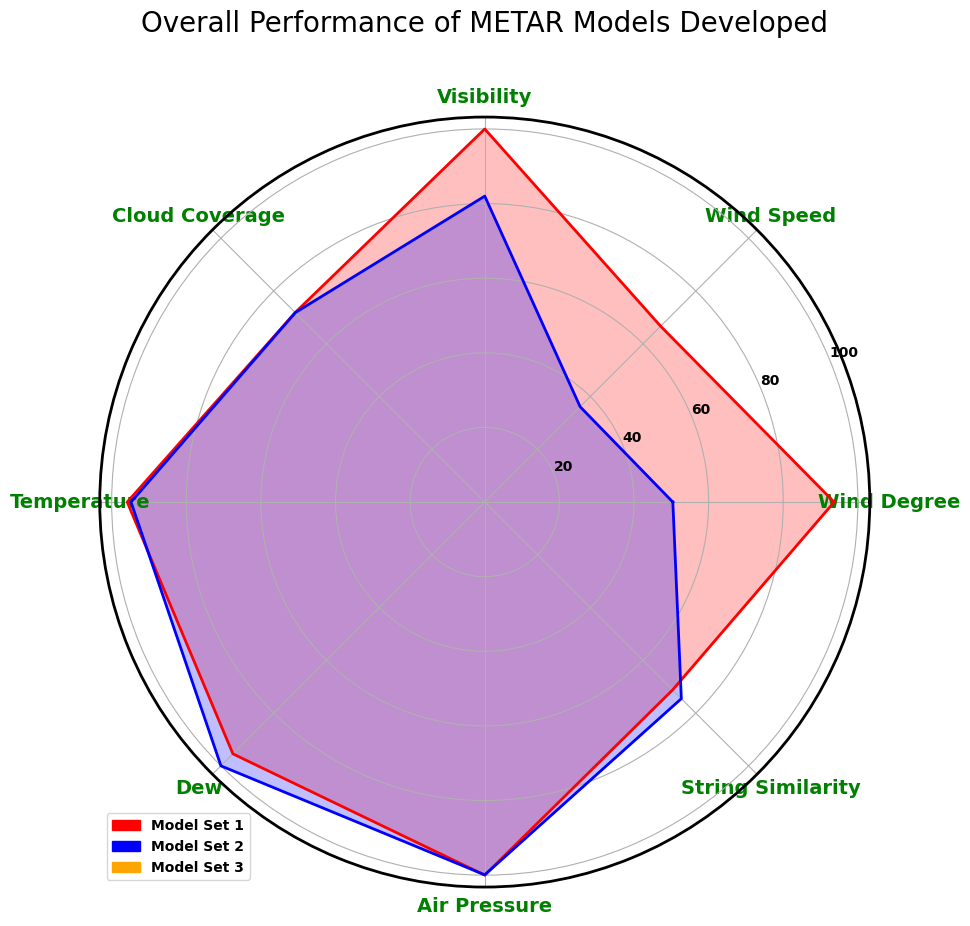

In [44]:
# Plot Result in 8 Dimension Benchmark plot
model_1_score = list(score_df.mean().values)
model_2_score = list(score_df_random.mean().values)
values = [model_1_score,model_2_score]
n_models = 2
fig = DBPlot.plot_model_set_benchmark( values, n_models )